In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import emoji
import re
import nltk
import mplcursors
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from dateutil import parser
from typing import List



In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrggi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
poli = pd.read_csv('politicos.csv')

In [ ]:
poli.head()

,Unnamed: 0,tweets_id,tweets_in_thread,created_at,text,retweet_count,like_count,reply_count,quote_count,user_id,username,user_name,user_picture,verified,clean_text,mentions,hashtags,emojis
0,0,['1453442766982287361'],1,2021-10-27T19:25:33.000Z,"PARABÉNS, PRESIDENTE LULA | 76 anos com energi...",1423,16845,939,323,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['parabens', 'presidente', 'lula', 'ano', 'ene...",NaN,['#equipelula'],NaN
1,1,['1453676921393324036'],1,2021-10-28T10:56:00.000Z,Ao vivo em instantes: https://t.co/DC3AqHTIDc,139,607,42,14,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['viver', 'instante']",NaN,NaN,NaN
2,2,['1453681221603581952'],1,2021-10-28T11:13:05.000Z,Entrevista de Lula para a Rádio Jovem Pan de S...,630,3013,319,57,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['entrevisto', 'lula', 'radiar', 'jovem', 'pan...",NaN,NaN,NaN
3,3,['1453682338941095940'],1,2021-10-28T11:17:32.000Z,Fiz 76 anos ontem com muito orgulho. Não sinto...,1702,27763,1853,318,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['fazer', 'ano', 'ontem', 'orgulhar', 'sentir'...",NaN,NaN,NaN
4,4,['1453685308755746818'],1,2021-10-28T11:29:20.000Z,Para que a iniciativa privada se apodere do Es...,734,4697,302,66,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['iniciativo', 'privar', 'apoderar', 'estar', ...",NaN,NaN,NaN


In [ ]:
poli.columns

Index(['Unnamed: 0', 'tweets_id', 'tweets_in_thread', 'created_at', 'text',
       'retweet_count', 'like_count', 'reply_count', 'quote_count', 'user_id',
       'username', 'user_name', 'user_picture', 'verified', 'clean_text',
       'mentions', 'hashtags', 'emojis'],
      dtype='object')

C:\Users\mrggi\AppData\Local\Temp\ipykernel_8692\3167007018.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

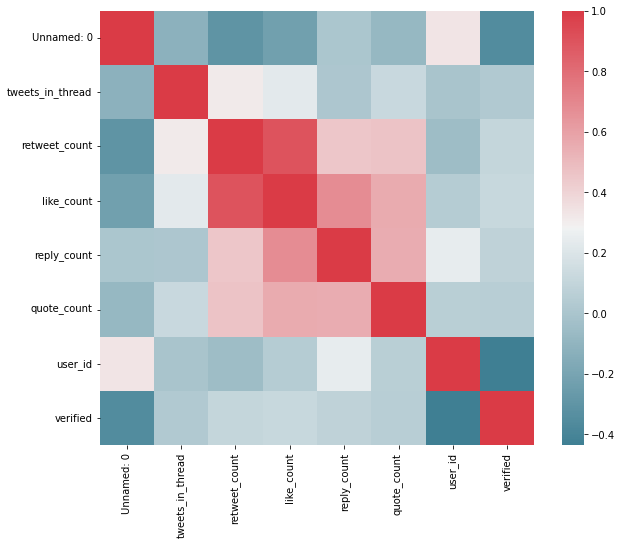

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = poli.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
poli.groupby(['username'])['tweets_id'].count()

username
AndreJanonesAdv    655
LeoPericlesUP      417
LulaOficial        586
SF_Moro            714
Sen_Alessandro     517
SimoneTebetms      623
aldorebelo         661
cirogomes          630
jairbolsonaro      482
jdoriajr           687
lfdavilaoficial    459
Name: tweets_id, dtype: int64

#### Hashtags

In [ ]:
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords =stopwords.words('portuguese')

In [ ]:
poli['user_name'].unique()

array(['Lula', 'Jair M. Bolsonaro', 'André Janones', 'Simone Tebet',
       "Felipe d'Avila", 'Ciro Gomes', 'João Doria', 'Sergio Moro',
       'Aldo Rebelo', 'Leo Péricles', 'Senador Alessandro Vieira'],
      dtype=object)

In [ ]:
poli.hashtags.fillna(' ')
test = poli.hashtags.astype(str).apply(lambda x: x.replace('[','').replace(']','').replace('\'','').strip())
poli.hashtags = test

*Bolsonaro nao usa hashtags?*

In [ ]:
# Lula
poli[poli.user_name == 'Jair M. Bolsonaro'].hashtags.value_counts().reset_index()

,index,hashtags
0,nan,482


In [ ]:
hashtags = poli[poli.user_name == 'Lula'].hashtags.value_counts().reset_index().drop(0)
hashtags

,index,hashtags
1,#equipelula,61
2,#76fatossobrelula,26
3,#lulaaovivo,10
4,#pt42anos,10
5,#lulanacbnvale,9
...,...,...
70,#76fatossobrelula23,1
71,#76fatossobrelula22,1
72,#76fatossobrelula21,1
73,#76fatossobrelula20,1


In [ ]:
poli.hashtags=='#equipelula'

0        True
1       False
2       False
3       False
4       False
        ...  
6426    False
6427    False
6428    False
6429    False
6430    False
Name: hashtags, Length: 6431, dtype: bool

In [ ]:

mu = poli[(poli.hashtags=='#equipelula')].like_count.mean()
sigma = poli[(poli.hashtags=='#equipelula')].like_count.std()

<AxesSubplot:>

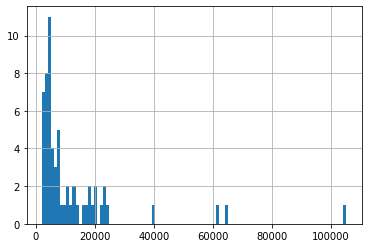

In [ ]:
poli[(poli.hashtags=='#equipelula')].like_count.hist(bins=100)

<AxesSubplot:>

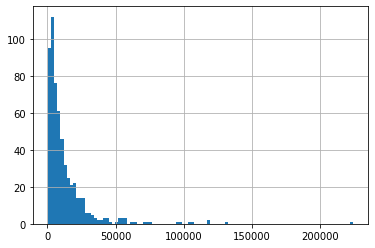

In [ ]:
poli[(poli.user_name == 'Lula')].like_count.hist(bins = 100)

In [ ]:
poli[(poli.user_name == 'Lula')].shape

(586, 18)

<AxesSubplot:>

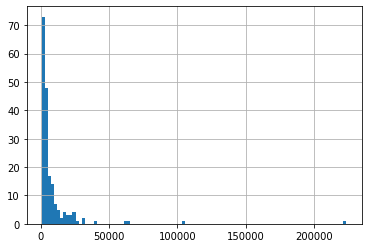

In [ ]:
poli[(poli.user_name == 'Lula') & (poli.hashtags != 'nan')].like_count.hist(bins = 100)

In [ ]:
poli

,Unnamed: 0,tweets_id,tweets_in_thread,created_at,text,retweet_count,like_count,reply_count,quote_count,user_id,username,user_name,user_picture,verified,clean_text,mentions,hashtags,emojis
0,0,['1453442766982287361'],1,2021-10-27T19:25:33.000Z,"PARABÉNS, PRESIDENTE LULA | 76 anos com energi...",1423,16845,939,323,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['parabens', 'presidente', 'lula', 'ano', 'ene...",NaN,#equipelula,NaN
1,1,['1453676921393324036'],1,2021-10-28T10:56:00.000Z,Ao vivo em instantes: https://t.co/DC3AqHTIDc,139,607,42,14,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['viver', 'instante']",NaN,nan,NaN
2,2,['1453681221603581952'],1,2021-10-28T11:13:05.000Z,Entrevista de Lula para a Rádio Jovem Pan de S...,630,3013,319,57,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['entrevisto', 'lula', 'radiar', 'jovem', 'pan...",NaN,nan,NaN
3,3,['1453682338941095940'],1,2021-10-28T11:17:32.000Z,Fiz 76 anos ontem com muito orgulho. Não sinto...,1702,27763,1853,318,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['fazer', 'ano', 'ontem', 'orgulhar', 'sentir'...",NaN,nan,NaN
4,4,['1453685308755746818'],1,2021-10-28T11:29:20.000Z,Para que a iniciativa privada se apodere do Es...,734,4697,302,66,2670726740,LulaOficial,Lula,https://pbs.twimg.com/profile_images/145778941...,True,"['iniciativo', 'privar', 'apoderar', 'estar', ...",NaN,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6426,6426,['1501213533261996034'],1,2022-03-08T15:09:32.000Z,A discussão sobre fertilizantes não exige mine...,140,1337,58,17,4250596815,Sen_Alessandro,Senador Alessandro Vieira,https://pbs.twimg.com/profile_images/111633750...,True,"['discussao', 'sobrar', 'fertilizante', 'exigi...",NaN,nan,NaN
6427,6427,['1501241756448342024'],1,2022-03-08T17:01:41.000Z,Recebi a visita do amigo e governador @jdoriaj...,68,1651,412,28,4250596815,Sen_Alessandro,Senador Alessandro Vieira,https://pbs.twimg.com/profile_images/111633750...,True,"['receber', 'visitar', 'amigar', 'governador',...",['@jdoriajr'],nan,NaN
6428,6428,['1501294583552126979'],1,2022-03-08T20:31:36.000Z,O governador Belivaldo consolida o seu total d...,18,215,10,3,4250596815,Sen_Alessandro,Senador Alessandro Vieira,https://pbs.twimg.com/profile_images/111633750...,True,"['governador', 'belivaldo', 'consolidar', 'tot...",NaN,nan,NaN
6429,6429,['1501708638121086978'],1,2022-03-09T23:56:54.000Z,Sem educação não existe futuro. A aprovação do...,73,956,84,5,4250596815,Sen_Alessandro,Senador Alessandro Vieira,https://pbs.twimg.com/profile_images/111633750...,True,"['educacao', 'existir', 'futurar', 'aprovacao'...",NaN,nan,NaN


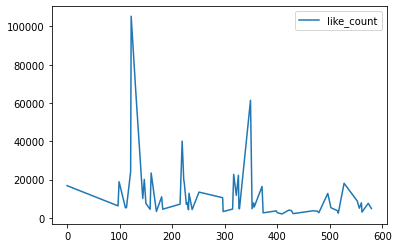

In [ ]:
df = poli[(poli.hashtags=='#equipelula')][['like_count','created_at']].plot()




In [ ]:
texts = list(poli[(poli.hashtags=='#equipelula') & (poli.user_name == 'Lula')].clean_text.apply(extract_words).apply(lambda x: ' '.join(x)))
vectorizer = CountVectorizer().fit_transform(texts)
vectors = vectorizer.toarray()
csim = cosine_similarity(vectors)
csim.shape

NameError: name 'extract_words' is not defined

In [ ]:
csim[0]

NameError: name 'csim' is not defined

In [ ]:
csim[5,5]

0.9999999999999998

In [ ]:
test = {1: [1, 2, 3],
        2: [4, 5, 6]}

for i in test.values():
    print(2 in i)

True
False


In [ ]:
groups = []

agg = {}

for i, row in enumerate(csim):
    for j, element in enumerate(row):
        if element > 0.5 and i!=j:
            groups.append((i,j))

for i in groups:
    if i[0] in agg.keys():
        agg[i[0]].append(i[1])
    else:
        agg[i[0]] = [i[0]]

agg

# for i in agg.keys():
#     for k,j in agg.items():
#         if i in j:
#             agg[k].append(agg[i])


# agg

{13: [13],
 33: [33, 41, 45, 46, 48, 58],
 39: [39, 41, 45, 46, 48, 58],
 41: [41, 39, 45, 46, 58],
 42: [42],
 45: [45, 39, 41, 48],
 46: [46, 39, 41, 53, 58],
 48: [48, 39, 45],
 53: [53],
 58: [58, 39, 41, 46]}

In [ ]:
polititians = poli['user_name'].unique()
for polititian in polititians:
    hashtags = poli[poli.user_name == polititian].hashtags.value_counts().reset_index()
    print(polititian, end = ': ')
    print(f'{list(hashtags["index"][1:6])}')
    print()


Lula: ['#equipelula', '#76fatossobrelula', '#lulaaovivo', '#pt42anos', '#lulanacbnvale']

Jair M. Bolsonaro: []

André Janones: ['#naojogueopovonarua', '#distritaonao', '#cpidacovid', '#pazuelloday', '#tokyo2020']

Simone Tebet: ['#cpidacovid', '#cpidacovid, #covaxin', '#sousimonesim, #frentedemocratica', '#sousimonesim, #frentedemocra, #tebetpresidente, #simonetebetms', '#simonetebet2022, #mdb, #mdbcomsimone2022']

Felipe d'Avila: ['#ladod', '#debatelide', '#2022emdebate', '#maisfunda', '#lfdavila, #novo']

Ciro Gomes: ['#cirogames', '#reactdocira', '#convenc', '#convenc, #cirorebeldiadaesperanc', '#cironacnn']

João Doria: ['#transpare, #governosp', '#spmaisseguro', '#tbt', '#vacinassalvam', '#vacinaja']

Sergio Moro: ['#moronoflow', '#moronoceara', '#abreascontasbolsolula', '#vacinasim', '#sqn']

Aldo Rebelo: ['#darcyfaz99, #99anosdarcyribeiro']

Leo Péricles: ['#forabolsonaro', '#leonardopericles, #leopericles2022, #unidadepopular, #socialismo, #poderpopular, #eleic, #presidenciave

In [ ]:
poli.hashtags.unique()

array(['#equipelula', 'nan', '#76fatossobrelula1', '#76fatossobrelula2',
       '#76fatossobrelula3', '#76fatossobrelula4', '#76fatossobrelula5',
       '#76fatossobrelula6', '#76fatossobrelula7', '#76fatossobrelula8',
       '#76fatossobrelula9', '#76fatossobrelula10', '#76fatossobrelula11',
       '#76fatossobrelula12', '#76fatossobrelula13',
       '#76fatossobrelula14', '#76fatossobrelula15',
       '#76fatossobrelula16', '#equipelulavi', '#76fatossobrelula17',
       '#76fatossobrelula18', '#76fatossobrelula19',
       '#76fatossobrelula20', '#76fatossobrelula21',
       '#76fatossobrelula22', '#76fatossobrelula23',
       '#76fatossobrelula24', '#76fatossobrelula25',
       '#76fatossobrelula26', '#76fatossobrelula27',
       '#76fatossobrelula28', '#76fatossobrelula29',
       '#76fatossobrelula30', '#76fatossobrelula31',
       '#76fatossobrelula32', '#76fatossobrelula33',
       '#76fatossobrelula34', '#76fatossobrelula35',
       '#76fatossobrelula36', '#76fatossobrelula37',


## Contagem de hashtags ao longo do tempo

In [ ]:
def hashtag_pattern(df: pd.DataFrame, hashtag: List[str], granularidade: str = "m") -> np.nan:
    """Generates count of hashtags appearence over time

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): hashtag list to visualize
        granularidade (str, optional): visualization scope Defaults to "m".

    Returns:
        np.nan: Doesn't return anything
    """


    # format dictionary

    formats = {'d': '%d/%m/%Y',
                'm': '%Y/%m',
                'y': '%Y'}


    # coping columns to use

    timeline_df = df[['created_at', 'hashtags']].copy()

    fig, ax = plt.subplots(1,1)

    # filtering for each hashtag

    for hash in hashtag:

        searcher = re.compile(hash)

        hash_df = timeline_df.copy()

        filter = hash_df.hashtags.apply(lambda x: True if searcher.search(x) else False)

        hash_df.created_at = hash_df.created_at.apply(lambda x: parser.parse(x).strftime(formats[granularidade])).copy()

        hashtag_df = hash_df[filter].groupby("created_at").count().reset_index()

        ax.plot(hashtag_df.created_at, hashtag_df.hashtags, label=hash)

    plt.legend()
    plt.show()
    

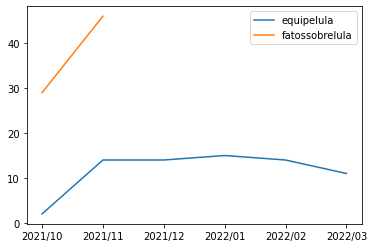

In [ ]:
hashtag_pattern(poli, ['equipelula', 'fatossobrelula'], granularidade='m')

## Número de likes por hashtag

In [ ]:
poli.columns

Index(['Unnamed: 0', 'tweets_id', 'tweets_in_thread', 'created_at', 'text',
       'retweet_count', 'like_count', 'reply_count', 'quote_count', 'user_id',
       'username', 'user_name', 'user_picture', 'verified', 'clean_text',
       'mentions', 'hashtags', 'emojis'],
      dtype='object')

In [ ]:
# box plot com média de likes
%matplotlib widget

def box_hash(df: pd.DataFrame, hashtag: List[str], metric: str, log: bool = True) -> np.nan:
    """_summary_

    Args:
        df (pd.DataFrame): polititians dataframe
        hashtag (List[str]): list of hashtags to visualize
        metric (str): metric to visualize
        log (bool, optional): use log scale or not Defaults to True.

    Returns:
        np.nan: Doesn't return anything
    """

    use_df = df.copy()
    like_df = use_df[[metric,'hashtags']]


    fig, ax = plt.subplots(1,1)

    # filtering for each hashtag

    metrics_dict = {h:[] for h in hashtag}

    for hash in hashtag:

        searcher = re.compile(hash)

        hash_df = like_df.copy()

        filter = hash_df.hashtags.apply(lambda x: True if searcher.search(x) else False)

        metrics_dict[hash].extend(hash_df[filter][metric])


    box = ax.boxplot(metrics_dict.values())
    if log: ax.set_yscale('log') 
    ax.set_xticklabels(metrics_dict.keys())

    
    cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set(text=metrics_dict.keys([sel.target.index]))
        

    plt.show()

    

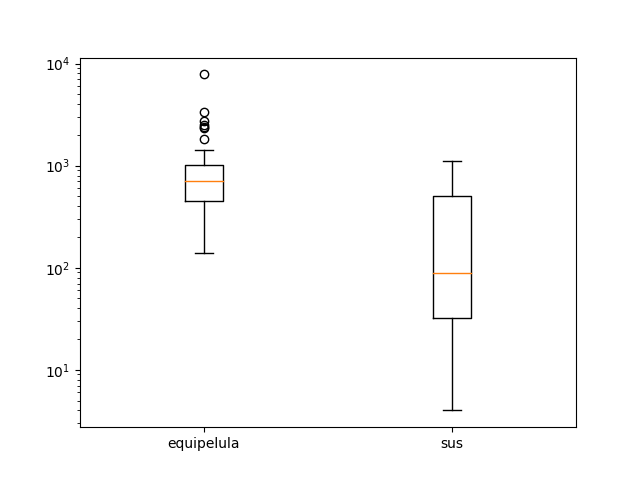

In [ ]:
box_hash(poli, ['equipelula','sus'], 'reply_count')

#### Wordclouds

In [ ]:
def extract_words(palavras: str):
    pat = re.compile("(?<=\')(.*?)(?=\')")
    words = pat.findall(palavras)[::2]
    return words

extract_words("teste")

[]

In [ ]:
extract_words(poli[poli.user_name == 'Lula'].clean_text[0])

In [ ]:
poli[poli.user_name == 'Lula'].clean_text.apply(extract_words)

In [ ]:
poli[poli.user_name == 'Lula'].clean_text

In [ ]:
' '.join([])

''

In [ ]:
poli.clean_text = poli.clean_text.apply(extract_words)

In [ ]:
lula = ' '.join(list(poli[poli.user_name == 'Lula'].clean_text.apply(lambda x: ' '.join(x))))

In [ ]:
stop = stopwords.words('portuguese')

In [ ]:
lula

In [ ]:
def words_candidate(candidate_name: str):
    candidate = ' '.join(list(poli[poli.user_name == candidate_name].clean_text.apply(lambda x: ' '.join(x))))
    wordcloud = WordCloud(width=480, height=480, margin=0).generate(candidate)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0,y=0)
    plt.show()
    return candidate

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrggi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
candidate = ' '.join(list(poli[poli.user_name == 'Ciro Gomes'].clean_text.apply(lambda x: ' '.join(x))))
tokens = nltk.word_tokenize(candidate)
freqs = nltk.FreqDist(tokens)
blah_list = [(k, v) for k, v in freqs.items()]
sorted_by_freq = sorted(blah_list, key=lambda tup: tup[1])
print(sorted_by_freq)

In [ ]:
words_candidate('Ciro Gomes')

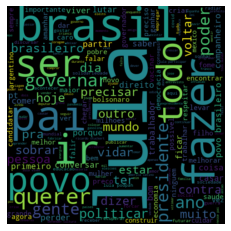

In [ ]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(lula)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

#### Emojis

In [ ]:
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [ ]:
poli.emojis.dropna().apply(extract_emojis).apply(lambda x: list(set(x)))

43         [👀]
87         [📢]
93         [📷]
95      [📷, 🏼]
100        [📷]
         ...  
6368       [😢]
6408    [🙏, 🏻]
6409    [🙏, 🏻]
6420       [🎯]
6421    [🙏, 🏻]
Name: emojis, Length: 523, dtype: object

In [ ]:
poli.emojis.dropna().apply(lambda x: x.replace('[','')).apply(lambda x: x.replace(']','')).apply(lambda x: x.split('\''))

43             [, 👀, ]
87           [, 📢📢📢, ]
93             [, 📷, ]
95      [, 🏼, , , 📷, ]
100            [, 📷, ]
             ...      
6368           [, 😢, ]
6408          [, 🙏🏻, ]
6409          [, 🙏🏻, ]
6420           [, 🎯, ]
6421          [, 🙏🏻, ]
Name: emojis, Length: 523, dtype: object

In [ ]:
poli.emojis.dropna().apply(lambda x: x)

43           ['👀']
87         ['📢📢📢']
93           ['📷']
95      ['🏼', '📷']
100          ['📷']
           ...    
6368         ['😢']
6408        ['🙏🏻']
6409        ['🙏🏻']
6420         ['🎯']
6421        ['🙏🏻']
Name: emojis, Length: 523, dtype: object